In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [5]:
X, y = make_blobs(centers=2, random_state=0)

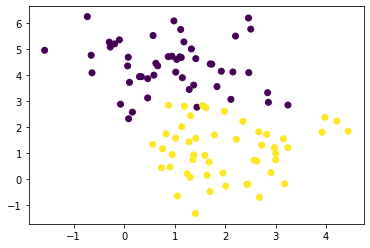

In [6]:
plt.scatter(X[:, 0], X[:, 1],c=y)

In [7]:
point = np.array([2, 2])

In [8]:
arr = np.sum((X - point)**2, axis= 1)

In [9]:
arr.argsort()[:5]

array([14, 29, 45, 37, 77])

In [10]:
nearest = X[arr.argsort()[:5]]
nearest.shape

(5, 2)

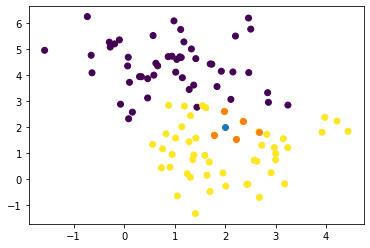

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(point[0], point[1])
plt.scatter(nearest[:, 0], nearest[:, 1])

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
model = KNeighborsClassifier(n_neighbors= 5)

In [16]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
model.predict(X_test[:10])

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [18]:
y_test[:10]

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [19]:
model.score(X_test, y_test)

0.9696969696969697

In [20]:
class KNNCuston:
    
    def __init__(self, n_neighbours=5):
        
        self.n_neighbours = n_neighbours
        
    def fit(self, X, y):
        
        self.X = X
        self.y = y
        
    def predict_point(self, point):
        
        distance = np.sum((self.X - point)**2, axis=1)
        nearest = self.y[distance.argsort()[:self.n_neighbours]]
        
        item, count = np.unique(nearest, return_counts=True)
        
        return item[count.argmax()]
    
    def predict(self, X):
        
        result = []
        
        for point in X:
            result.append(self.predict_point(point))
            
        return np.array(result)
    
    def score(self, X, y):
        
        yp = self.predict(X)
        
        return (yp == y).mean()

In [21]:
mod = KNNCuston()

In [23]:
mod.fit(X_train, y_train)

In [24]:
mod.predict(X_test[:10])

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [25]:
y_test[:10]

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [26]:
mod.score(X_test, y_test)

0.9696969696969697

In [29]:
acc = []

for n in range(1, 100):
    
    mod2 = KNNCuston(n_neighbours=n)
    
    mod2.fit(X_train, y_train)
    
    mod2.predict_point(np.array([2, 3]))
    
    acc.append(mod2.score(X_test, y_test))

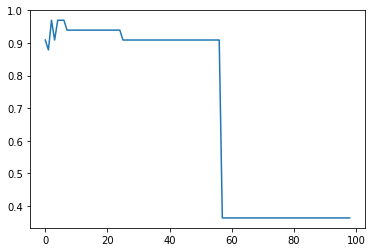

In [30]:
plt.plot(acc)